In [103]:
# Importar liberias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
# Convertir a pesos
df = pd.read_csv('weight-height.csv')[['Height', 'Weight', 'Gender']].sample(50).reset_index()
df['Height'] = np.round(df.Height * 2.54) / 100
df['Weight'] = np.round(df.Weight * 0.453592)

In [105]:
# Grafique peso vs altura


Text(0, 0.5, 'Peso')

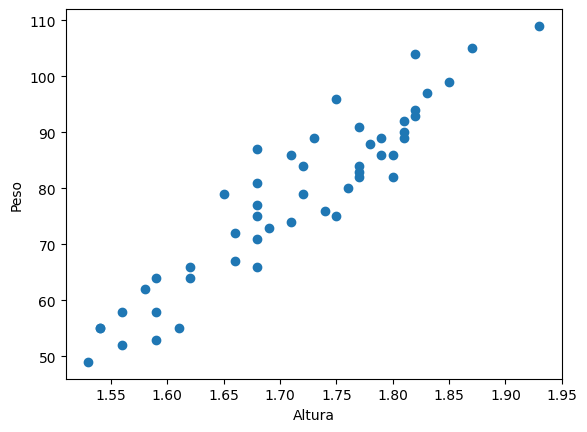

In [106]:
plt.scatter(df.Height, df.Weight)
plt.xlabel('Altura')
plt.ylabel('Peso')

# Llega alguien de 1.7 metros  ¿cuanto peso tiene?

Idea 1: centimetros = peso


In [107]:
# CM = peso, altura por 100 - 10
df['centrimetros'] = df.Height * 100 - 100
df.head()

,index,Height,Weight,Gender,centrimetros
0,921,1.85,99.0,Male,85.0
1,663,1.68,75.0,Male,68.0
2,7382,1.59,53.0,Female,59.0
3,2125,1.78,88.0,Male,78.0
4,2798,1.80,82.0,Male,80.0


Text(0, 0.5, 'Peso')

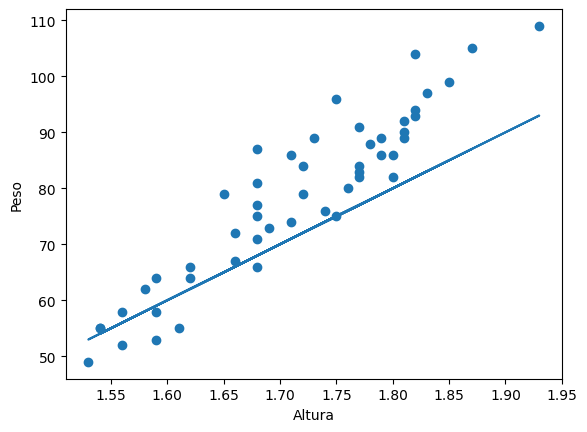

In [108]:
# Grafique el modelo
plt.scatter(df.Height, df.Weight)
plt.plot(df.Height, df.centrimetros)
plt.xlabel('Altura')
plt.ylabel('Peso')

### ¿Qué tan bueno es mi modelo? Saquemos el error

In [109]:
# Error
error_centrimetro = np.sum(np.power(df.Weight - df.centrimetros, 2))

In [110]:
# error promedio
error_promedio = np.sum(np.power(df.Weight - df.Weight.mean(), 2))


In [111]:
error_centrimetro

4820.0

In [112]:
error_promedio 

11088.18

La intuición de esta métrica es --> que tan mejor es mi modelo a si simplemente no tengo modelo y uso el promedio

$$R^2 = \frac{ErrorPromedio - ErrorModelo}{ErrorPromedio} $$

In [113]:
# Obten la mejora en error
(error_promedio - error_centrimetro) / error_promedio

0.5653028720673726

In [114]:
# Usa Sklearn
from sklearn.metrics  import r2_score
#valor del modelo - valor real 
r2_centrimetros = r2_score(y_pred= df.centrimetros, y_true=df.Weight)
r2_centrimetros 

0.5653028720673727

## ¿Podemos mejorar este modelo? Si podemos, un método sencillo es calcular una regresión lineal


$$h(x) = \theta_0 + \theta_1 * x $$



$$J(\theta)  ={\frac{1}{2} \sum (h(x) - y)^2} $$

$$\frac{\partial }{\partial \theta_i} J(\theta)  = \frac{\partial }{\partial \theta_i} \frac{1}{2}(h(x) - y)^2$$


Reptir hasta converger {
$$ \theta_i  := \theta_i - \alpha * \frac{\partial }{\partial \theta_i} J(\theta) $$

}



Ya con el gradiente calculado tenemos  {
$$ \theta_i  := \theta_i - \alpha * (h(x) - y) * x_i $$

}



In [115]:
def cost_function(X, y, theta):
    m = len(y) 
    
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J

In [116]:
def gradient_descent(X, y, theta, alpha, iterations):

    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history
     

In [117]:
## Add a columns of 1s as intercept to X
X_df = df[['Height']]
X_df['intercept'] = 1
y_df = df[['Weight']]

alpha = 0.1

## Transform to Numpy arrays for easier matrix math and start theta at 0
X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([40, 40])
m = len(X_df)

/tmp/ipykernel_32518/3858364062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['intercept'] = 1


$$Weight = 40 + 40 X $$

In [118]:
# theta
cost_function(X, y, theta)


518.1076

In [119]:
(t, c) = gradient_descent(X,y,theta, 0.5, 1500)

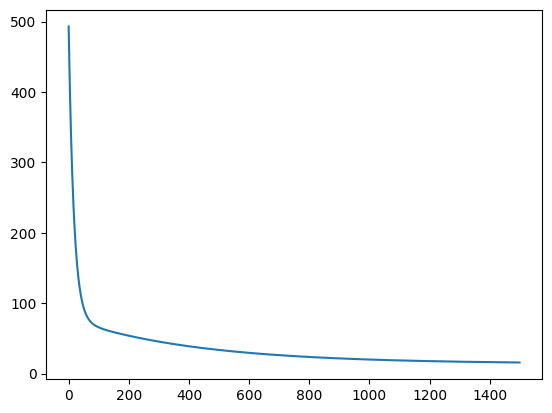

In [120]:
# Grafique el costo por iteración 
plt.plot(c)

In [121]:
# ¿Cómo quedo el modelo?
t

array([ 124.36763315, -134.59063277])

Escriba la formula
$$Weight = \theta_0 + \theta_1 *altura$$


In [122]:
# Prediga usando el modelo
-108 + 107 *1.7
df['modelo1'] = -108 + 107 * df.Height

### Ejemplo, Alguien mide 1.7 metros de altura ... ¿cuanto pesa?

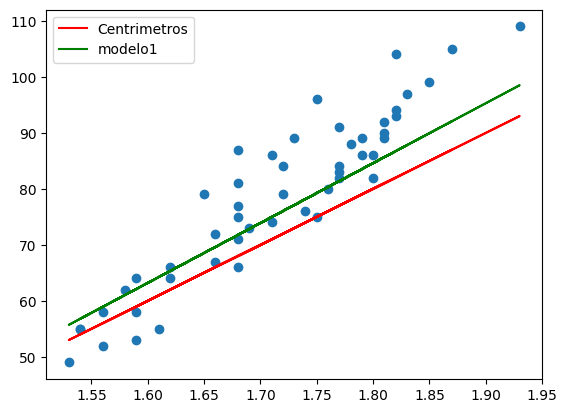

In [123]:
# Grafique el modelo y comparelo con los otros
plt.scatter(df.Height, df.Weight) 
plt.plot(df.Height, df.centrimetros, label= 'Centrimetros', c='r')
plt.plot(df.Height, df.modelo1, label= 'modelo1', c='g')
plt.legend()

In [124]:
# Error del segundo modelo
error_promedio 

11088.18

In [125]:
error_modelo = np.sum(np.power(df.Weight - df.modelo1, 2))
error_modelo 

2524.0729

In [126]:
r2 = (error_promedio - error_modelo) / error_promedio
r2

0.7723636430866022

In [127]:
# Obtenga el R2 del segundo modelo 


In [128]:
# Error cuadratico medio del segundo modelo
r2_score(y_true = df.Weight, y_pred= df.modelo1)


0.7723636430866021

# Ahora usa sklearn

In [129]:
from sklearn.linear_model import LinearRegression 

In [130]:
X = df[['Height']]
y = df[['Weight']]

model = LinearRegression().fit(X, y) 

In [131]:
model.intercept_


array([-168.86596635])

In [132]:
model.coef_

array([[144.32471481]])

In [133]:
df['modelo2'] = model.predict(X)

In [134]:
r2_score(y_pred=df.modelo2, y_true=df.Weight)

0.873751693273971

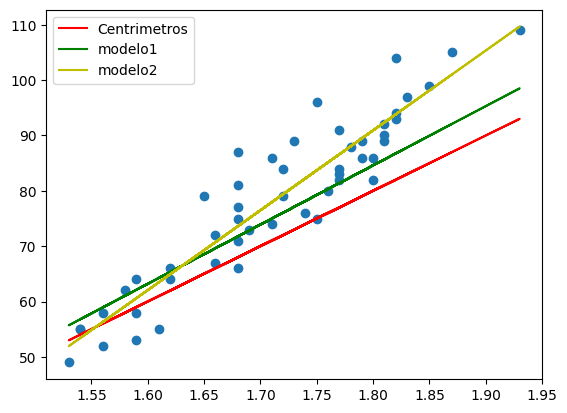

In [135]:
plt.scatter(df.Height, df.Weight) 
plt.plot(df.Height, df.centrimetros, label= 'Centrimetros', c='r')
plt.plot(df.Height, df.modelo1, label= 'modelo1', c='g')
plt.plot(df.Height, df.modelo2, label= 'modelo2', c='y')
plt.legend()

# Ahora usa sklearn para regresión lineal multiple 

$$h(x) = \theta_0 + \theta_1 * x $$
$$Peso = \theta_0 + \theta_1 * altura $$


In [136]:
df['is_male'] = df['Gender'] == 'Male'

In [137]:
df.groupby('Gender').mean()

,index,Height,Weight,centrimetros,modelo1,modelo2,is_male
Gender,,,,,,,
Female,7919.722222,1.622778,63.00000,62.277778,65.637222,65.340974,0.0
Male,2022.937500,1.764375,87.09375,76.437500,80.788125,85.776952,1.0


### Usando scikit learn 

In [138]:
from sklearn.linear_model import LinearRegression


In [139]:
# Error con sklearn
X = df[['is_male', 'Height']] 
y = df[['Weight']]

model = LinearRegression().fit(X, y) 


In [140]:
# Intercepto
model.intercept_

array([-129.85544407])

In [141]:
# Coeficiente
model.coef_

array([[  7.26594058, 118.84279334]])

Escriba el modelo



In [142]:
#Mujer, 1.70
-94 + 97*1.7 + 9.43*0

70.9

In [143]:
# Prediga el modelo
df['modelo_multiple'] = model.predict(X) 


In [146]:
# Error del modelo
r2_score(y_pred = df.modelo_multiple, y_true = df.Weight)

0.9013638671801161

In [147]:
# Crea una lista con colores
color = ['green' if i == 'Male' else 'blue' for i in df.Gender]

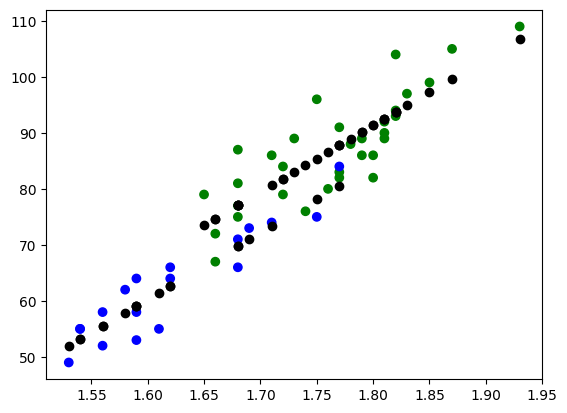

In [149]:
# Grafique los modelos
plt.scatter(df.Height, df.Weight, c=color)
plt.scatter(df.Height, df.modelo_multiple, c='black')

In [82]:
# Alguien mide 1.7, ¿cuanto pesa?


In [44]:
# Compare error de los 3 modelos